<a href="https://colab.research.google.com/github/Likhi2005/Crop-Prediction/blob/main/Crop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
Path to dataset files: /kaggle/input/crop-recommendation-dataset


Dataset Shape: (2200, 8)

First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int

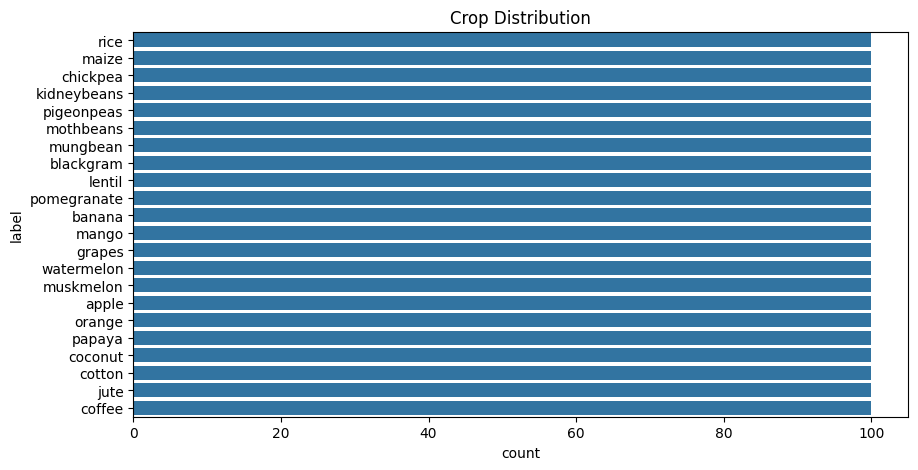

Unique Crops: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Train size: (1760, 7)
Test size: (440, 7)
✅ Model training done
Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00  

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# =============================
# Step 1: Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# =============================
# Step 2: Load Dataset
# =============================
data = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

# =============================
# Step 3: Data Exploration
# =============================
print("\nDataset Info:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())

# Crop distribution
plt.figure(figsize=(10,5))
sns.countplot(y=data['label'], order=data['label'].value_counts().index)
plt.title("Crop Distribution")
plt.show()

# =============================
# Step 4: Encode Target (Crop Labels)
# =============================
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])

print("Unique Crops:", le.classes_)

# =============================
# Step 5: Split Dataset
# =============================
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# =============================
# Step 6: Train Model
# =============================
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("✅ Model training done")

# =============================
# Step 7: Evaluate Model
# =============================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# =============================
# Step 8: Prediction Function
# =============================
def predict_crop(N, P, K, temperature, humidity, ph, rainfall, field_area=5, previous_yield=3.5, irrigation_system="Drip"):
    """
    Predict recommended crop, yield, and irrigation requirement.
    """
    # Crop prediction
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    crop_code = model.predict(features)[0]
    crop_name = le.inverse_transform([crop_code])[0]

    # Simulated Yield Prediction (simple formula based on nutrients & rainfall)
    yield_pred = round(previous_yield + (N+P+K)/300 + rainfall/2000 - temperature/100, 2)
    total_yield = round(yield_pred * field_area, 2)

    # Irrigation Requirement Estimation
    water_need = {
        "Wheat": 450,
        "Rice": 1200,
        "Maize": 500,
        "Sugarcane": 1800,
        "Cotton": 700
    }
    irrigation_need = water_need.get(crop_name, 600) - rainfall
    irrigation_need = max(irrigation_need, 0)  # no negative irrigation

    return {
        "Recommended Crop": crop_name,
        "Expected Yield (tons/ha)": yield_pred,
        "Total Yield (tons)": total_yield,
        "Irrigation Needed (mm/year)": irrigation_need,
        "Irrigation System": irrigation_system
    }

# =============================
# Step 9: Test Prediction
# =============================
result = predict_crop(
    N=60, P=40, K=35,
    temperature=25, humidity=80, ph=6.5, rainfall=800,
    field_area=5, previous_yield=3.5, irrigation_system="Drip Irrigation"
)

print("\n🌾 Prediction Results:")
for key, value in result.items():
    print(f"{key}: {value}")

# =============================
# Step 10: Save Model
# =============================
joblib.dump(model, "crop_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Model & Encoder saved")
